### Пример вычисления градиента

In [53]:
import numpy as np

Зададим массив, для которого хотим найти градиент, и вычислим его

In [54]:
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
 
np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

Задание 6.5

Вычислите градиент функции

In [55]:
from sympy import symbols, solve, Eq

In [56]:
a, b = symbols('a b')

In [57]:
f = (5 - a - 2 * b)**2
f

(-a - 2*b + 5)**2

In [58]:
f_diff_a = f.diff(a)
f_diff_a

2*a + 4*b - 10

In [59]:
f_diff_b = f.diff(b)
f_diff_b

4*a + 8*b - 20

Градиент в точке M(1; 1)

In [60]:
x = f_diff_a.subs({a: 1, b: 1})
y = f_diff_b.subs({a: 1, b: 1})
print(f'Gradient = ({x}, {y})')

Gradient = (-4, -8)


Задание 6.6

Найдите точку в которой градиент нулевой

In [61]:
w0, w1 = symbols('w0 w1')

In [62]:
L = (2.1 - w0 - w1)**2 + (2.9 - w0 - 3 * w1)**2 + (4.1 - w0 - 5 * w1)**2
L

4.41*(-0.476190476190476*w0 - 0.476190476190476*w1 + 1)**2 + 9*(-w0/3 - w1 + 0.966666666666667)**2 + 25*(-w0/5 - w1 + 0.82)**2

Нахожу первые частные производные из которых составляю вектор, который является градиентом

In [63]:
L_diff_w0 = L.diff(w0)
L_diff_w0

6.0*w0 + 18.0*w1 - 18.2

In [64]:
L_diff_w1 = L.diff(w1)
L_diff_w1

18.0*w0 + 70.0*w1 - 62.6

Ищу значения аргументов при которых градиент становится нулевым.

Для этого приравниваю производные нулю и решаю систему урованений.

In [65]:
eq0 = Eq(L_diff_w0, 0)
eq1 = Eq(L_diff_w1, 0)

sol = solve([eq0, eq1], [w0, w1])
sol

{w0: 1.53333333333333, w1: 0.500000000000000}

Задание 6.7
Пусть дан одномерный массив f.

Вычислите градиент массива f, увеличив шаг сетки в семь раз, и укажите значение седьмого элемента массива получившихся градиентов f.

In [66]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])

In [67]:
np.gradient(f, 7)[7]

1.4285714285714286

# Визуализация градиентного спуска

Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане.

In [68]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [69]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

Определим функцию, которая вычислит градиент:

In [70]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

Также запрограммируем простейший вариант для градиентного спуска:

In [71]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    
    # массив из двух случайных чисел, начальных координат старта градиентного спуска
    x = np.random.uniform(0, 3, size=2) 
    lst.append(x)
    
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

Напишем функцию, которая будет строить график:

In [72]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

Визуализируем и получим следующее движение градиентного спуска к минимуму:

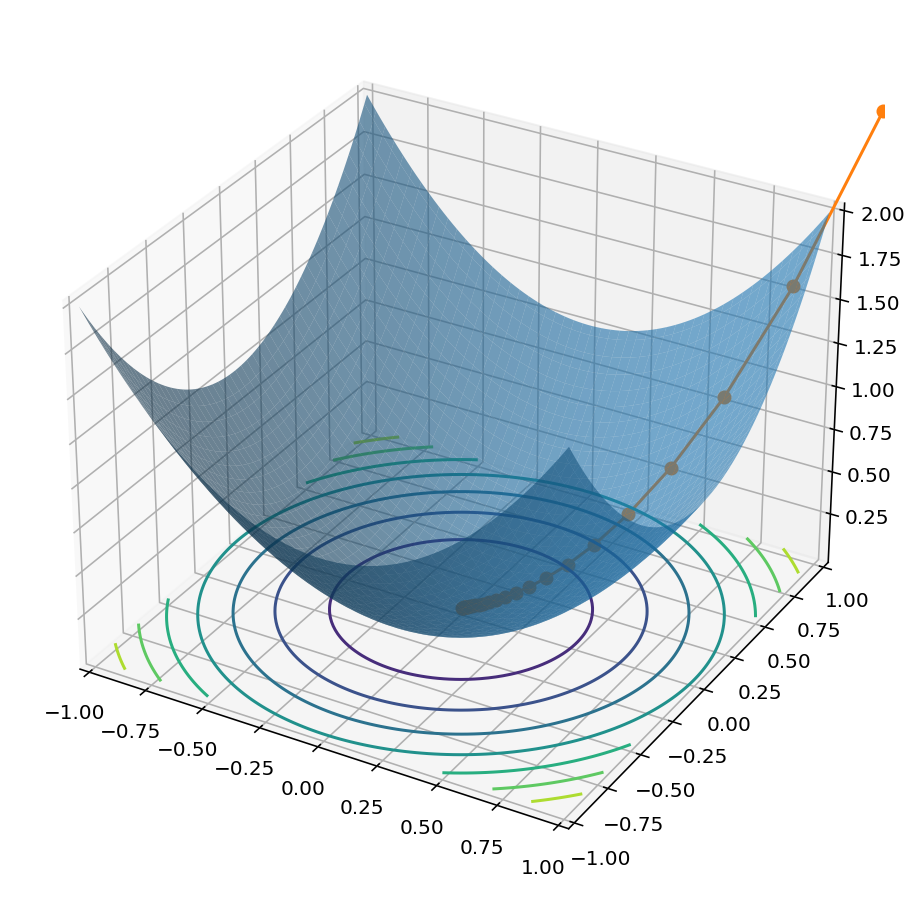

In [73]:
trace = grad_descend(grad, 0.1, 30)
plot_grad(fun, trace=trace)

Задание 7.7

Найдите следующую точку градиентного спуска для функции.

Если текущая точка - (0; 0; 0), alpha=0.25.

In [74]:
alpha = 0.25
x, y, z = symbols('x y z')

f = 2 * x**2 - 4 * x * z + 4 * y**2 - 8 * y * z + 9 * z**2 + 4 * x + 8 * y - 20 * z
f

2*x**2 - 4*x*z + 4*x + 4*y**2 - 8*y*z + 8*y + 9*z**2 - 20*z

Определяю градиент как вектор частных производных. 

Т.к. мне нужен антиградиент, то меняю знак для каждого элемента вектора

In [75]:
f_diff_x = f.diff(x)
f_diff_y = f.diff(y)
f_diff_z = f.diff(z)

Считаю значение вектора для точки (0; 0; 0)

In [76]:
g0 = f_diff_x.subs({x: 0, y: 0, z: 0})
g1 = f_diff_y.subs({x: 0, y: 0, z: 0})
g2 = f_diff_z.subs({x: 0, y: 0, z: 0})


Получаю градиент

In [81]:
G = np.array([g0, g1, g2], dtype=float)
G

array([  4.,   8., -20.])

Вычисляю антиградиент умноженный на темп обучения

In [83]:
G * (-1) * alpha

array([-1., -2.,  5.])